In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [22]:
path = 'https://raw.githubusercontent.com/ovibaridar/Data_sets/main/mall%20customers.csv'

In [23]:
data = pd.read_csv(path)

In [24]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
data = data.drop('CustomerID' , axis=1)

In [26]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [27]:
data.rename(columns={'Annual Income (k$)':'Incom','Spending Score (1-100)':'Score'}, inplace=True)

In [28]:
data.head()

,Gender,Age,Incom,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


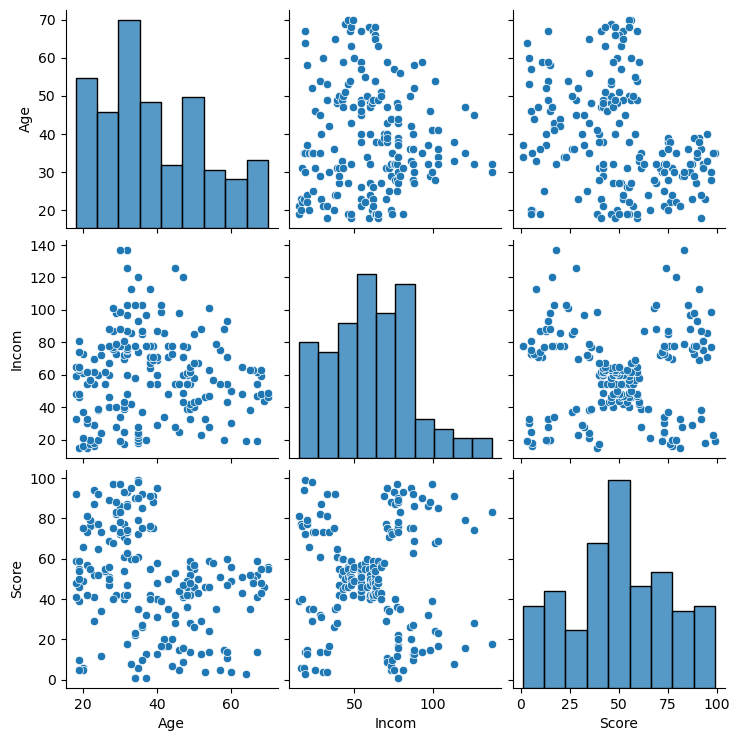

In [29]:
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
sns.pairplot(data[['Age','Incom','Score']])

Text(0, 0.5, 'Score')

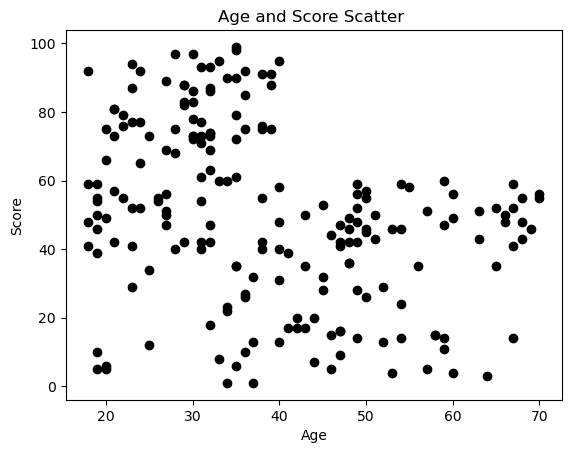

In [14]:
plt.scatter(data.Age , data.Score,color='black')
plt.title('Age and Score Scatter ')
plt.xlabel('Age')
plt.ylabel('Score')

In [30]:
from kneed import KneeLocator

In [31]:
from sklearn.cluster import KMeans

In [33]:
wcss = []
for k in range(1,15):
    kms  = KMeans(n_clusters=k)
    kms.fit(data[['Age','Score']])
    wcss.append(kms.inertia_)

In [34]:
wcss

[171535.5,
 75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23810.46223307136,
 19506.941015125227,
 15877.41462011807,
 13050.131029357115,
 11484.814123841843,
 10131.183985072232,
 9383.343082009007,
 8631.648919553847,
 8096.062582025817,
 7380.651206663706]

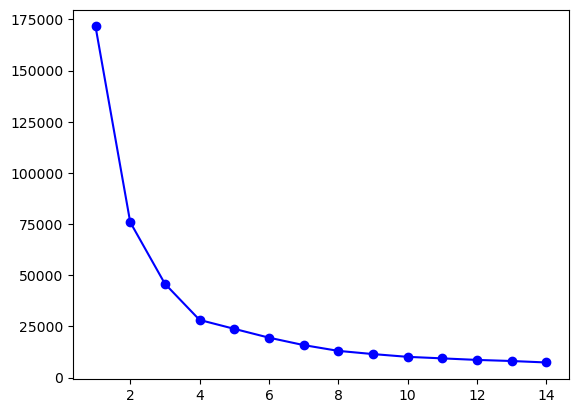

In [38]:
plt.plot(range(1,15),wcss,marker='o',color='b')

In [39]:
kn = KneeLocator(range(1,15), wcss, direction='decreasing', curve='convex')

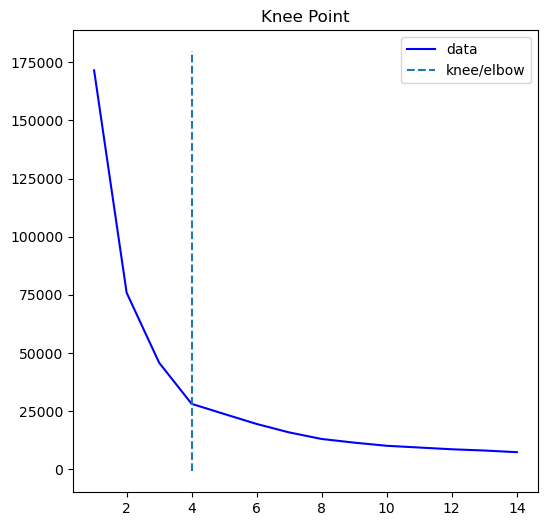

In [42]:
kn.plot_knee()

In [59]:
km = KMeans(n_clusters=4)

In [60]:
km.fit(data[['Age','Score']])

KMeans(n_clusters=4)

In [61]:
data['clusters'] = km.predict(data[['Age','Score']])

In [62]:
data.head()

,Gender,Age,Incom,Score,clusters
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,1
4,Female,31,17,40,3


In [63]:
c_center = km.cluster_centers_

In [64]:
c_center

array([[43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [55.70833333, 48.22916667],
       [27.61702128, 49.14893617]])

In [65]:
d0 = data[data['clusters']==0]
d1 = data[data['clusters']==1]
d2 = data[data['clusters']==2]
d3 = data[data['clusters']==3]

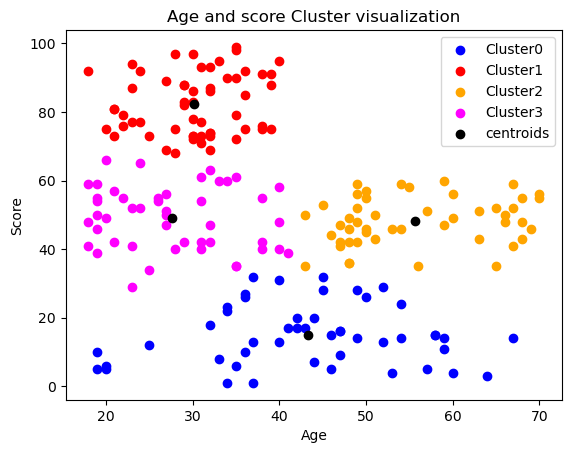

In [67]:
plt.title('Age and score Cluster visualization')
plt.xlabel('Age')
plt.ylabel('Score')
plt.scatter(d0.Age , d0.Score,color = 'blue',label='Cluster0')
plt.scatter(d1.Age , d1.Score,color = 'red',label='Cluster1')
plt.scatter(d2.Age , d2.Score,color = 'orange',label='Cluster2')
plt.scatter(d3.Age , d3.Score,color = 'magenta',label='Cluster3')
plt.scatter(c_center[:,0] , c_center[:,1], color='black', label='centroids')
plt.legend()